In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
dataset = pd.read_csv(file_path)

# Exploratory Data Analysis

In [41]:
dataset.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [42]:
print("Missing Values:\n", dataset.isnull().sum())

Missing Values:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [43]:
print("\nDataset Info:")
print(dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


# Summarize Key Data with Descriptive Statistics

In [44]:
# Summary statistics (mean, median, variance, standard deviation)
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                'Stress Level', 'Heart Rate', 'Daily Steps']

summary_stats = dataset[numeric_cols].agg(['mean', 'median', 'var', 'std']).T
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
                                mean  median           var          std
Age                        42.184492    43.0  7.522324e+01     8.673133
Sleep Duration              7.132086     7.2  6.330696e-01     0.795657
Quality of Sleep            7.312834     7.0  1.432703e+00     1.196956
Physical Activity Level    59.171123    60.0  4.339224e+02    20.830804
Stress Level                5.385027     5.0  3.148944e+00     1.774526
Heart Rate                 70.165775    70.0  1.710381e+01     4.135676
Daily Steps              6816.844920  7000.0  2.617651e+06  1617.915679


In [45]:
# Separate Daily Steps from other variables
summary_stats_excluding_steps = summary_stats.drop(index='Daily Steps')
daily_steps_stats = summary_stats.loc['Daily Steps']

In [46]:
# Define the custom color palette
custom_colors = ['#d4e8d6', '#81d4fa', '#4682b4', '#36454f', '#31356e']

<Figure size 1200x600 with 0 Axes>

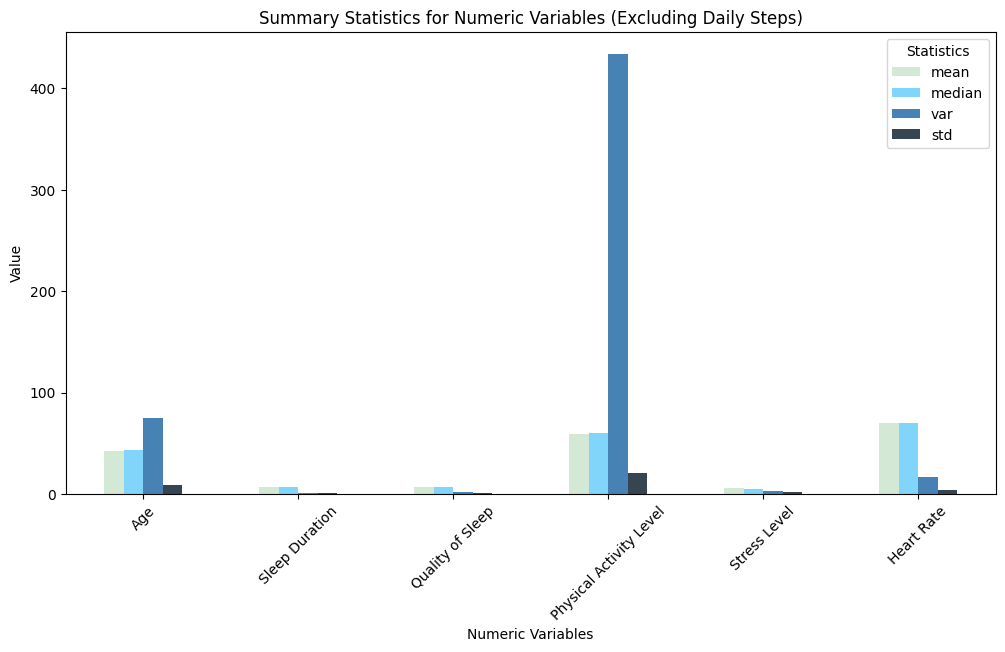

In [47]:
plt.figure(figsize=(12, 6))
summary_stats_excluding_steps[['mean', 'median', 'var', 'std']].plot(
    kind='bar', figsize=(12, 6), color=custom_colors[:4])
plt.title('Summary Statistics for Numeric Variables (Excluding Daily Steps)')
plt.ylabel('Value')
plt.xlabel('Numeric Variables')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.show()

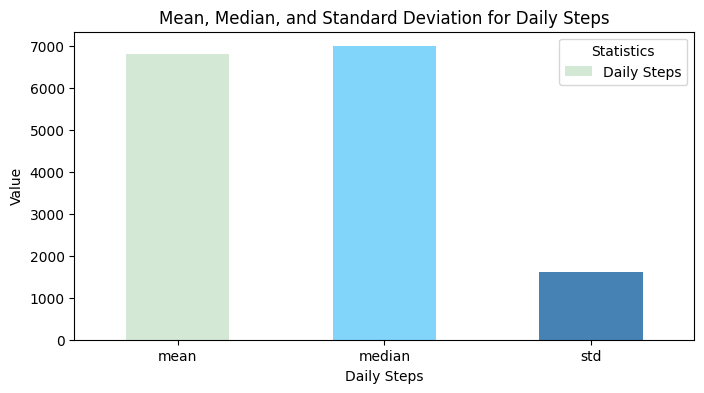

In [48]:
plt.figure(figsize=(8, 4))
daily_steps_stats[['mean', 'median', 'std']].plot(kind='bar', color=custom_colors[:3])
plt.title('Mean, Median, and Standard Deviation for Daily Steps')
plt.ylabel('Value')
plt.xlabel('Daily Steps')
plt.xticks(rotation=0)
plt.legend(title='Statistics')
plt.show()

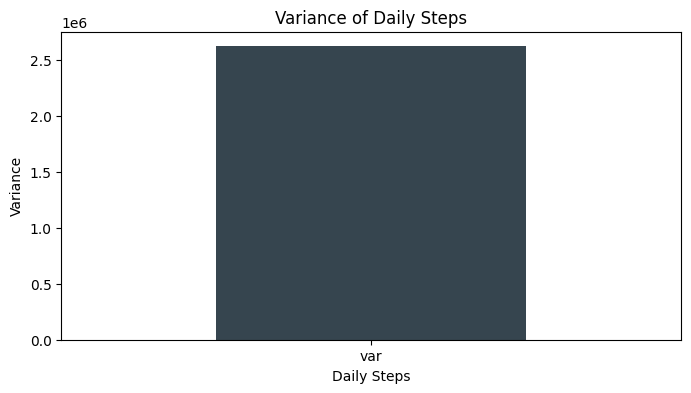

In [49]:
plt.figure(figsize=(8, 4))
daily_steps_stats[['var']].plot(kind='bar', color=custom_colors[3])
plt.title('Variance of Daily Steps')
plt.ylabel('Variance')
plt.xlabel('Daily Steps')
plt.xticks(rotation=0)
plt.show()

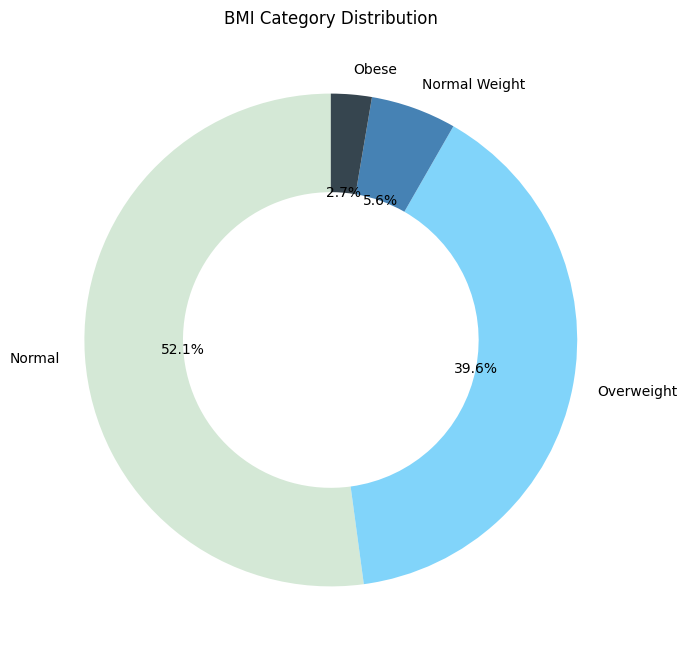

In [50]:
bmi_counts = dataset['BMI Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=custom_colors[:len(bmi_counts)], wedgeprops=dict(width=0.4))
plt.title('BMI Category Distribution')
plt.show()

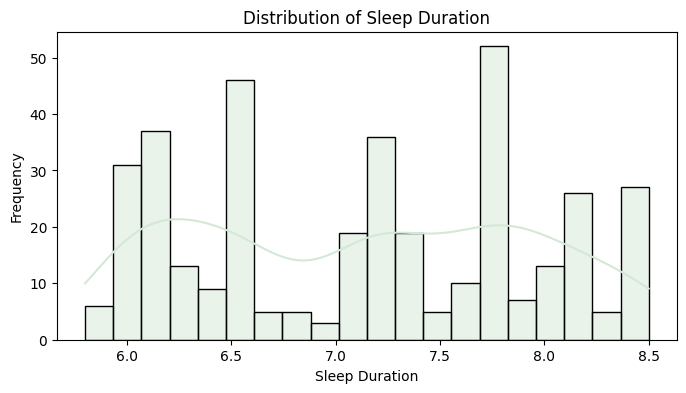

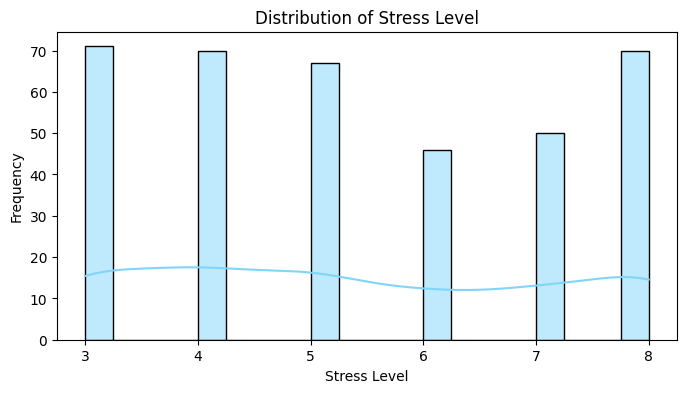

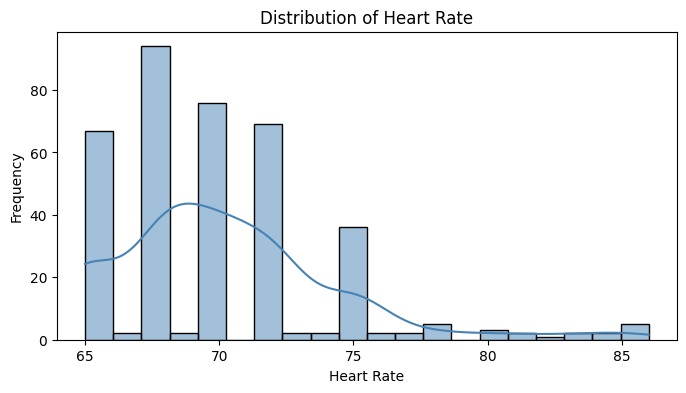

In [51]:
key_variables = ['Sleep Duration', 'Stress Level', 'Heart Rate']
for i, col in enumerate(key_variables):
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, bins=20, color=custom_colors[i])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

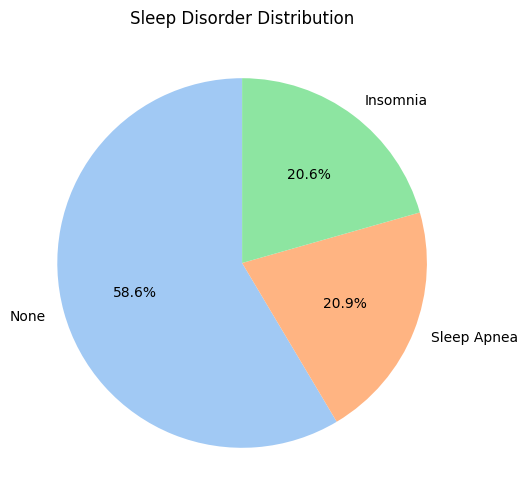

In [52]:
# Highlight Distribution of Sleep Disorders
disorder_counts = dataset['Sleep Disorder'].value_counts()
plt.figure(figsize=(8, 6))
disorder_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Sleep Disorder Distribution')
plt.ylabel('')
plt.show()

# Conduct a Probability Analysis

In [53]:
high_stress_count = len(dataset[dataset['Stress Level'] > 7])
total_count = len(dataset)
prob_high_stress = high_stress_count / total_count
print(f"\nProbability of Stress Level > 7: {prob_high_stress:.2f}")


Probability of Stress Level > 7: 0.19


In [54]:
stress_disorder_count = len(dataset[(dataset['Stress Level'] > 7) & (dataset['Sleep Disorder'] != 'None')])
prob_disorder_given_stress = stress_disorder_count / high_stress_count
print(f"Probability of Sleep Disorder given Stress Level > 7: {prob_disorder_given_stress:.2f}")

Probability of Sleep Disorder given Stress Level > 7: 0.53


In [55]:
# Define condition for low sleep duration
low_sleep_duration = dataset['Sleep Duration'] < 6.5
high_stress = dataset['Stress Level'] > 7

# Calculate the probability of High Stress Given Low Sleep Duration
prob_high_stress_given_low_sleep = len(dataset[low_sleep_duration & high_stress]) / len(dataset[low_sleep_duration])
print(f"Probability of High Stress Given Low Sleep Duration: {prob_high_stress_given_low_sleep:.2f}")

Probability of High Stress Given Low Sleep Duration: 0.73


In [56]:
high_stress = dataset['Stress Level'] > 7

# Split the 'Blood Pressure' column into 'Systolic BP' and 'Diastolic BP'
dataset[['Systolic BP', 'Diastolic BP']] = dataset['Blood Pressure'].str.split('/', expand=True).astype(int)

# Define hypertension condition
hypertension = (dataset['Systolic BP'] > 130) | (dataset['Diastolic BP'] > 80)

# Probability of Hypertension Given High Stress
prob_hypertension_given_stress = len(dataset[high_stress & hypertension]) / len(dataset[high_stress])
print(f"Probability of Hypertension Given High Stress: {prob_hypertension_given_stress:.2f}")

Probability of Hypertension Given High Stress: 0.53


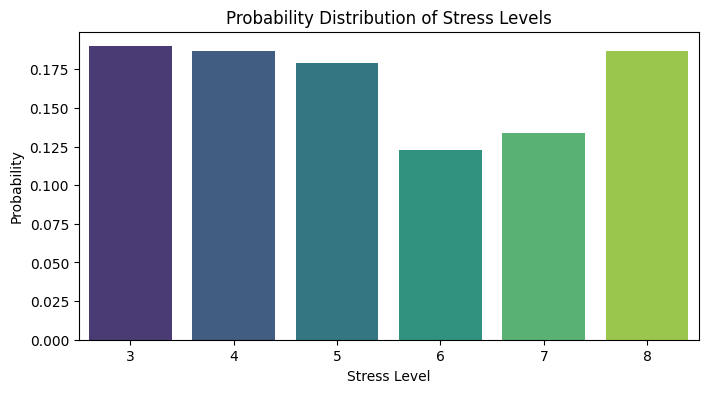

In [57]:
stress_levels = dataset['Stress Level']
prob_dist = stress_levels.value_counts(normalize=True).sort_index()
plt.figure(figsize=(8, 4))
sns.barplot(x=prob_dist.index, y=prob_dist.values, palette='viridis')
plt.title("Probability Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Probability")
plt.show()

# Perform Hypothesis Testing

In [58]:
from scipy.stats import ttest_ind

In [59]:
high_sleep_quality_threshold = 7
high_stress_threshold = 7

In [60]:
high_sleep_quality = dataset['Quality of Sleep'] >= high_sleep_quality_threshold
low_sleep_quality = dataset['Quality of Sleep'] < high_sleep_quality_threshold
high_stress = dataset['Stress Level'] >= high_stress_threshold
low_stress = dataset['Stress Level'] < high_stress_threshold

In [61]:
heart_rate_high_sleep = dataset[high_sleep_quality]['Heart Rate']
heart_rate_low_sleep = dataset[low_sleep_quality]['Heart Rate']
heart_rate_high_stress = dataset[high_stress]['Heart Rate']
heart_rate_low_stress = dataset[low_stress]['Heart Rate']

In [62]:
t_stat_sleep, p_val_sleep = ttest_ind(heart_rate_high_sleep, heart_rate_low_sleep)

t_stat_stress, p_val_stress = ttest_ind(heart_rate_high_stress, heart_rate_low_stress)

In [63]:
print(f"Hypothesis Test: Sleep Quality vs Heart Rate")
print(f"T-Statistic: {t_stat_sleep:.2f}, P-Value: {p_val_sleep:.4f}")

print(f"\nHypothesis Test: Stress Level vs Heart Rate")
print(f"T-Statistic: {t_stat_stress:.2f}, P-Value: {p_val_stress:.4f}")

Hypothesis Test: Sleep Quality vs Heart Rate
T-Statistic: -14.94, P-Value: 0.0000

Hypothesis Test: Stress Level vs Heart Rate
T-Statistic: 14.44, P-Value: 0.0000


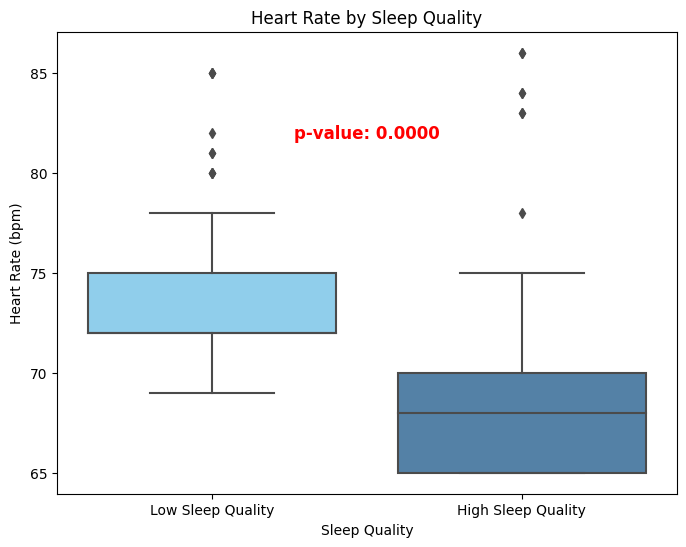

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=high_sleep_quality.map({True: 'High Sleep Quality', False: 'Low Sleep Quality'}), 
            y=dataset['Heart Rate'], 
            palette=['#81d4fa', '#4682b4'])
plt.title('Heart Rate by Sleep Quality')
plt.ylabel('Heart Rate (bpm)')
plt.xlabel('Sleep Quality')

plt.gca().text(0.5, max(dataset['Heart Rate']) * 0.95, f"p-value: {p_val_sleep:.4f}", 
               ha='center', color='red', fontsize=12, fontweight='bold')

plt.show()

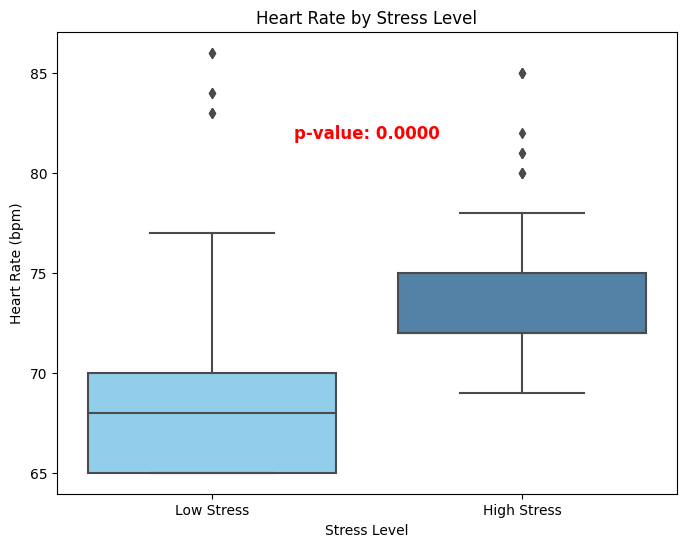

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=high_stress.map({True: 'High Stress', False: 'Low Stress'}), 
    y=dataset['Heart Rate'], 
    palette=['#81d4fa', '#4682b4']
)
plt.title('Heart Rate by Stress Level')
plt.ylabel('Heart Rate (bpm)')
plt.xlabel('Stress Level')

plt.gca().text(0.5, max(dataset['Heart Rate']) * 0.95, f"p-value: {p_val_stress:.4f}", 
               ha='center', color='red', fontsize=12, fontweight='bold')

plt.show()

# Analyze Relationships Through Correlation or Regression

In [66]:
from scipy.stats import linregress

In [67]:
x = dataset['Stress Level']
y = dataset['Heart Rate']

In [68]:
correlation_coefficient = x.corr(y)
print(f"Pearson Correlation Coefficient (Stress Level vs Heart Rate): {correlation_coefficient:.2f}")

Pearson Correlation Coefficient (Stress Level vs Heart Rate): 0.67


In [69]:
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"Linear Regression Results:")
print(f"  Slope: {slope:.2f}")
print(f"  Intercept: {intercept:.2f}")
print(f"  R-squared: {r_value**2:.2f}")
print(f"  P-value: {p_value:.4f}")

Linear Regression Results:
  Slope: 1.56
  Intercept: 61.76
  R-squared: 0.45
  P-value: 0.0000


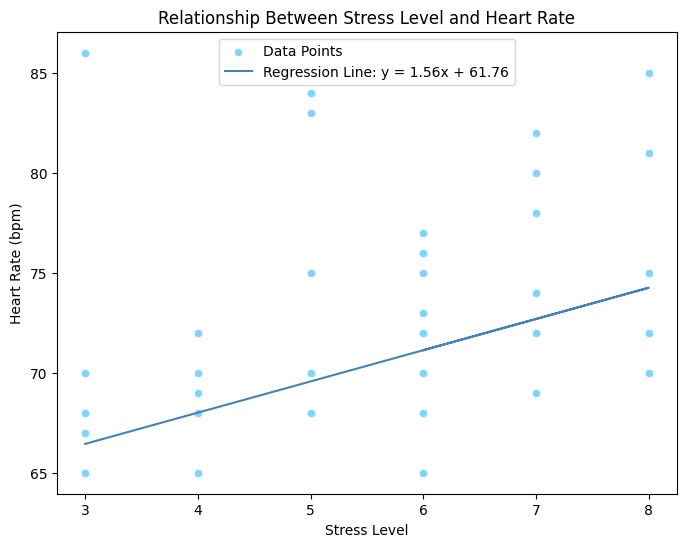

In [70]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='#81d4fa', label='Data Points') 
plt.plot(x, slope * x + intercept, color='#4682b4', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Relationship Between Stress Level and Heart Rate')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.show()

Linear Regression Results (Sleep Quality vs Physical Activity):
  Slope: 3.36, Intercept: 34.62, R-squared: 0.04, P-value: 0.0002


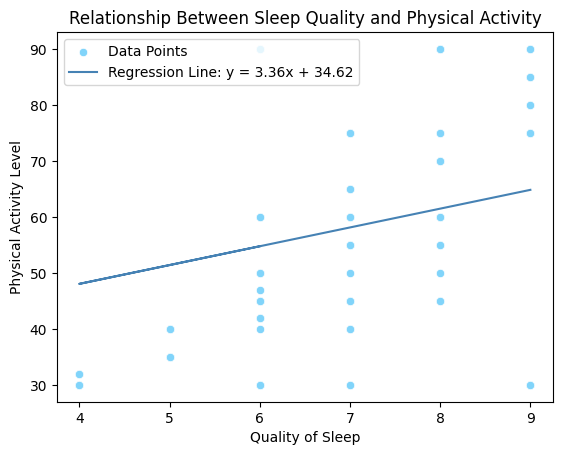

In [71]:
x_sleep = dataset['Quality of Sleep']
y_activity = dataset['Physical Activity Level']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_sleep, y_activity)
print(f"Linear Regression Results (Sleep Quality vs Physical Activity):")
print(f"  Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-squared: {r_value**2:.2f}, P-value: {p_value:.4f}")

# Scatter plot with regression line
sns.scatterplot(x=x_sleep, y=y_activity, color='#81d4fa', label='Data Points')  # Change scatter point color
plt.plot(x_sleep, slope * x_sleep + intercept, color='#4682b4', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')  # Change line color
plt.title('Relationship Between Sleep Quality and Physical Activity')
plt.xlabel('Quality of Sleep')
plt.ylabel('Physical Activity Level')
plt.legend()
plt.show()